In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


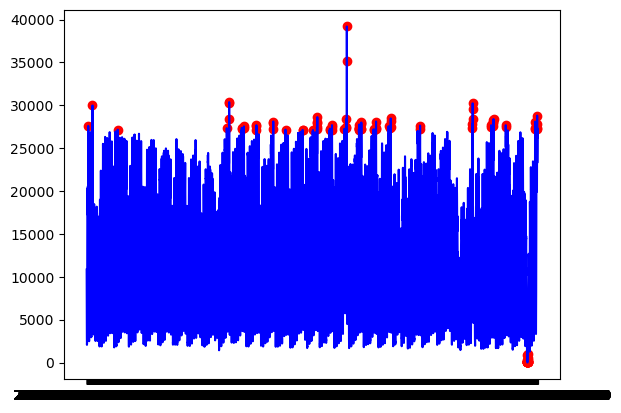

In [2]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

# Loads dataframe from csv file
# csv 파일에서 데이터프레임을 로드합니다.
X = pd.read_csv("/kaggle/input/nyc-taxi-traffic/dataset.csv")

# Initialize Classifier object
# 분류자 객체 초기화
isoforest = IsolationForest(contamination=float(0.01))

# Train Classifier object on Trained Data
# 훈련된 데이터에 대한 분류자 객체 훈련
isoforest.fit(pd.DataFrame(X['value']))

# Predict the response for test dataset
# 테스트 데이터 세트에 대한 응답 예측
predictions = isoforest.predict(pd.DataFrame(X['value']))

# Concatenates the predictions to the initial dataframe
# 예측을 초기 데이터프레임에 연결합니다.
datums = pd.concat([X.reset_index(drop=True), pd.DataFrame(predictions)], axis=1)

fig, ax = plt.subplots()

# Isolate anomaly times
# 이상 시간 격리
a = datums.loc[datums[0] == -1, ['timestamp', 'value']]

# Plot the initial data
# 초기 데이터를 그래프
ax.plot(X['timestamp'], X['value'], color='blue')

# Scatterplot the anomalies
# 이상 현상을 산점도 그래프
ax.scatter(a['timestamp'], a['value'], color='red')

plt.show()

In [3]:
a

,timestamp,value
37,2014-07-01 18:30:00,27598
134,2014-07-03 19:00:00,29985
710,2014-07-15 19:00:00,27167
3206,2014-09-05 19:00:00,27337
3261,2014-09-06 22:30:00,30313
...,...,...
10264,2015-01-30 20:00:00,27308
10309,2015-01-31 18:30:00,27286
10310,2015-01-31 19:00:00,28804
10311,2015-01-31 19:30:00,27773
